# Sleep Analysis

## Data Load

In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
import pyedflib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,5)

if __name__ == '__main__':
    try:
        f = pyedflib.EdfReader("./data/20211030/20211031_030301_BRP.edf")
        print("\nlibrary version: %s" % pyedflib.version.version)

        print("\ngeneral header:\n")

        print("edfsignals: %i" % f.signals_in_file)
        print("file duration: %i seconds" % f.file_duration)
        print("startdate: %i-%i-%i" % (f.getStartdatetime().day,f.getStartdatetime().month,f.getStartdatetime().year))
        print("starttime: %i:%02i:%02i" % (f.getStartdatetime().hour,f.getStartdatetime().minute,f.getStartdatetime().second))
        print("patient: %s" % f.getPatientName())
        print("recording: %s" % f.getPatientAdditional())
        print("patientcode: %s" % f.getPatientCode())
        print("gender: %s" % f.getGender())
        print("birthdate: %s" % f.getBirthdate())
        print("patient_name: %s" % f.getPatientName())
        print("patient_additional: %s" % f.getPatientAdditional())
        print("admincode: %s" % f.getAdmincode())
        print("technician: %s" % f.getTechnician())
        print("equipment: %s" % f.getEquipment())
        print("recording_additional: %s" % f.getRecordingAdditional())
        print("datarecord duration: %f seconds" % f.getFileDuration())
        print("number of datarecords in the file: %i" % f.datarecords_in_file)
        print("number of annotations in the file: %i" % f.annotations_in_file)

        channel = 1
        print("\nsignal parameters for the %d.channel:\n\n" % channel)

        print("label: %s" % f.getLabel(channel))
        print("samples in file: %i" % f.getNSamples()[channel])
        print("physical maximum: %f" % f.getPhysicalMaximum(channel))
        print("physical minimum: %f" % f.getPhysicalMinimum(channel))
        print("digital maximum: %i" % f.getDigitalMaximum(channel))
        print("digital minimum: %i" % f.getDigitalMinimum(channel))
        print("physical dimension: %s" % f.getPhysicalDimension(channel))
        print("prefilter: %s" % f.getPrefilter(channel))
        print("transducer: %s" % f.getTransducer(channel))
        print("samplefrequency: %f" % f.getSampleFrequency(channel))

        annotations = f.readAnnotations()
        for n in np.arange(f.annotations_in_file):
            print("annotation: onset is %f    duration is %s    description is %s" % (annotations[0][n],annotations[1][n],annotations[2][n]))

        buf = f.readSignal(channel)
        n = 200
        print("\nread %i samples\n" % n)
        result = ""
        for i in np.arange(n):
            result += ("%.1f, " % buf[i])
        print(result)
        f._close()
        del f
    except IOError:
        print("could not open file")
        f._close()
        del f


library version: 0.1.22

general header:

edfsignals: 3
file duration: 24960 seconds
startdate: 31-10-2021
starttime: 3:03:01
patient: 
recording: 
patientcode: 
gender: 
birthdate: 
patient_name: 
patient_additional: 
admincode: 
technician: 
equipment: 
recording_additional: 
datarecord duration: 24960.000000 seconds
number of datarecords in the file: 416
number of annotations in the file: 0

signal parameters for the 1.channel:


label: Press.40ms
samples in file: 624000
physical maximum: 40.000000
physical minimum: 0.000000
digital maximum: 2000
digital minimum: 0
physical dimension: cmH2O
prefilter: 
transducer: 
samplefrequency: 25.000000

read 200 samples

0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

## Data Visualize

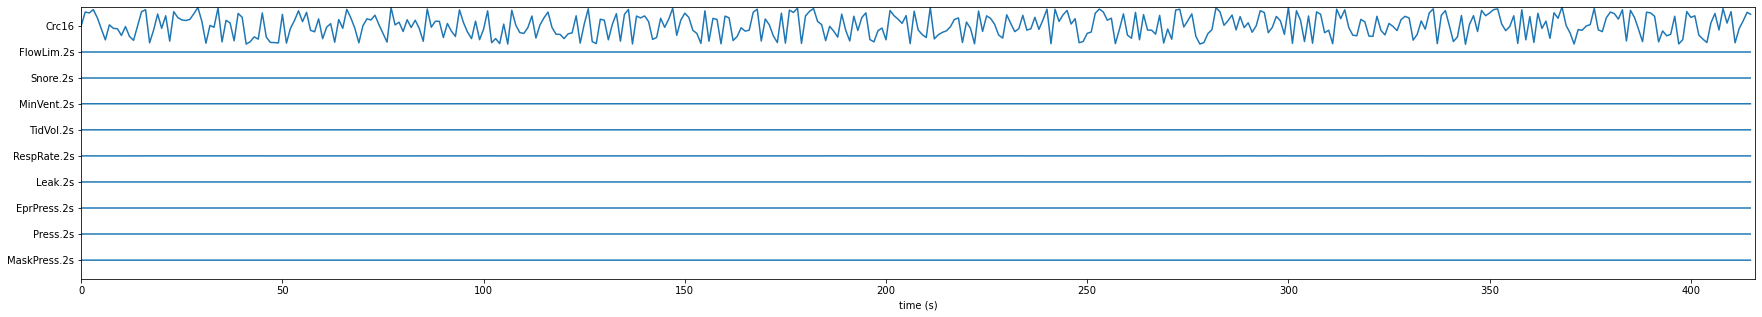

In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
import pyedflib
from stacklineplot import stackplot

if __name__ == '__main__':
    f = pyedflib.EdfReader("data/20211030/20211031_030301_PLD.edf")
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    n_min = f.getNSamples()[0]
    sigbufs = [np.zeros(f.getNSamples()[i]) for i in np.arange(n)]
    for i in np.arange(n):
        sigbufs[i] = f.readSignal(i)
        if n_min < len(sigbufs[i]):
            n_min = len(sigbufs[i])
    f._close()
    del f

    n_plot = np.min((n_min, 416))
    sigbufs_plot = np.zeros((n, n_plot))
    for i in np.arange(n):
        sigbufs_plot[i,:] = sigbufs[i][:n_plot]

    stackplot(sigbufs_plot[:, :n_plot], ylabels=signal_labels)